In [36]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [37]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [38]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [39]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [40]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [41]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [42]:
driver_ids = driver_standings['driverId'].unique()

In [43]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20, 856], dtype=int64)

In [44]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [45]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [46]:
race_names = races.set_index('raceId')['name'].to_dict()

In [47]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [48]:
driver_standings.reset_index(inplace=True)

In [49]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
358,33773,71692,1092,20,32.0,11,11,0,VET,Japanese Grand Prix
357,33772,71693,1092,856,2.0,21,21,0,DEV,Japanese Grand Prix
377,33792,71683,1092,840,13.0,15,15,0,STR,Japanese Grand Prix
366,33781,71684,1092,848,4.0,19,19,0,ALB,Japanese Grand Prix


In [50]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [51]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
374,33789,71680,1092,4,65.0,9,9,0,ALO,Japanese Grand Prix
375,33790,71681,1092,855,6.0,18,18,0,ZHO,Japanese Grand Prix
376,33791,71682,1092,854,12.0,16,16,0,MSC,Japanese Grand Prix
377,33792,71683,1092,840,13.0,15,15,0,STR,Japanese Grand Prix


In [52]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [53]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix,gray
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix,darkblue
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix,darkblue
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix,darkgreen
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix,dodgerblue
...,...,...,...,...,...,...,...,...,...,...,...
374,33789,71680,1092,4,65.0,9,9,0,ALO,Japanese Grand Prix,mediumblue
375,33790,71681,1092,855,6.0,18,18,0,ZHO,Japanese Grand Prix,darkred
376,33791,71682,1092,854,12.0,16,16,0,MSC,Japanese Grand Prix,snow
377,33792,71683,1092,840,13.0,15,15,0,STR,Japanese Grand Prix,darkgreen


In [54]:
grouped = driver_standings.groupby(['Team','raceId'])

In [55]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [56]:
driver_standings['Name']

0      GAS
1      VER
2      PER
3      HUL
4      LAT
      ... 
374    ALO
375    ZHO
376    MSC
377    STR
378    LEC
Name: Name, Length: 379, dtype: object

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


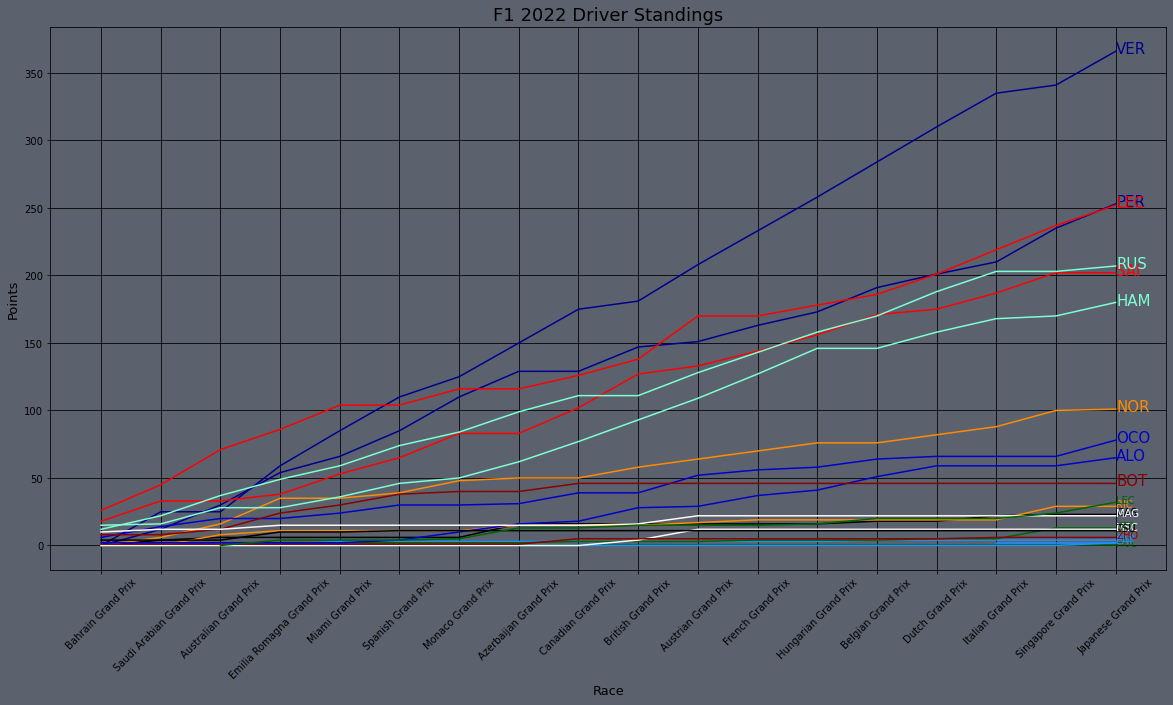

In [57]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [58]:
last_most_race = driver_standings['raceId'].unique()[-1]

In [59]:
driverids = driver_standings[(driver_standings['raceId'] == last_most_race) & (driver_standings['points'] <= 35)]['driverId']

In [60]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [61]:
driver_standings2[driver_standings2['raceId'] == last_most_race]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
357,33772,71693,1092,856,2.0,21,21,0,DEV,Japanese Grand Prix,dodgerblue
358,33773,71692,1092,20,32.0,11,11,0,VET,Japanese Grand Prix,darkgreen
359,33774,71691,1092,842,23.0,13,13,0,GAS,Japanese Grand Prix,gray
362,33777,71688,1092,807,0.0,22,22,0,HUL,Japanese Grand Prix,darkgreen
363,33778,71687,1092,849,2.0,20,20,0,LAT,Japanese Grand Prix,dodgerblue
365,33780,71685,1092,817,29.0,12,12,0,RIC,Japanese Grand Prix,darkorange
366,33781,71684,1092,848,4.0,19,19,0,ALB,Japanese Grand Prix,dodgerblue
370,33785,71676,1092,825,22.0,14,14,0,MAG,Japanese Grand Prix,snow
373,33788,71679,1092,852,11.0,17,17,0,TSU,Japanese Grand Prix,gray
375,33790,71681,1092,855,6.0,18,18,0,ZHO,Japanese Grand Prix,darkred


In [62]:
dev_add = {
    'driverStandingsId' : 00000,
    'raceId' : 1088,
    'driverId': 856,	
    'points':0,
    'position':22,
    'positionText' : '22',
    'wins' : 0,
    'Name'	: 'DEV', 
    'Race Name' : 'Dutch Grand Prix',
    'Team': 'dodgerblue'}

In [63]:
blank = pd.DataFrame(columns=driver_standings2.columns[0:])
blank.append(dev_add,ignore_index=True)

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,NaN,0,1088,856,0,22,22,0,DEV,Dutch Grand Prix,dodgerblue


In [64]:
driver_standings2 = blank.append(driver_standings2, ignore_index=True)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


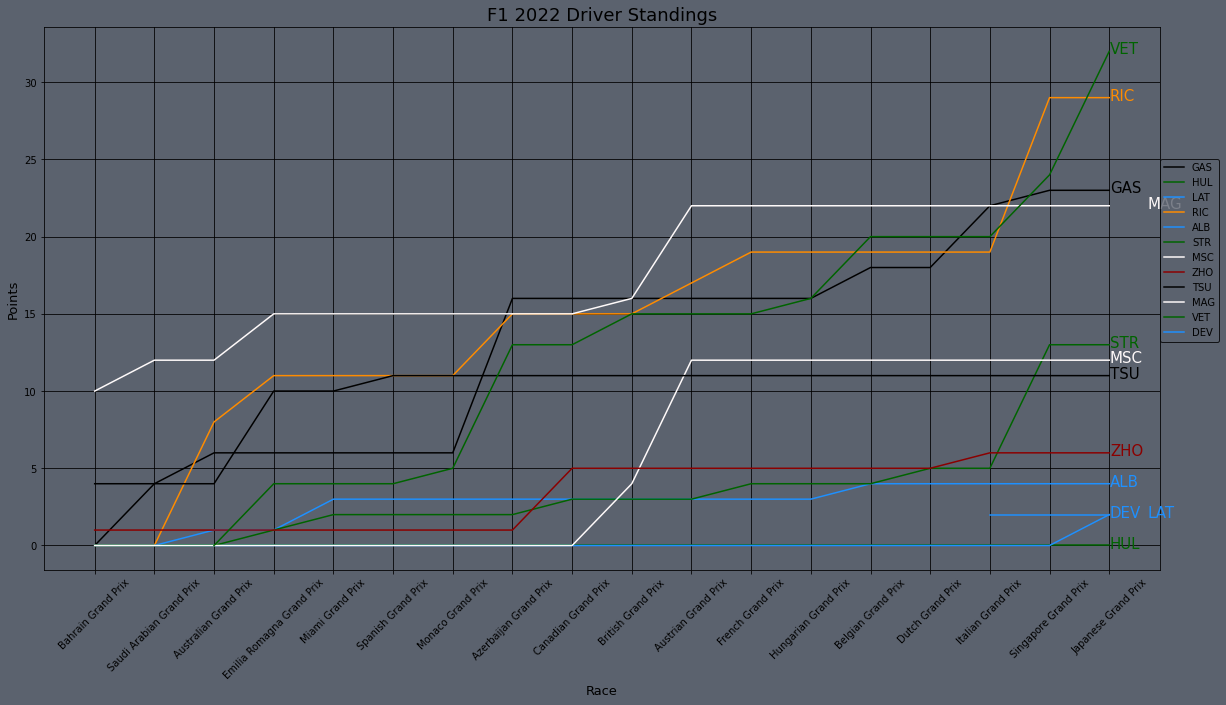

In [65]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','black','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)




x = 0
for line, name in zip(ax.lines, driver_standings2['Name']):
    #print(name)
    if name=='MAG' and x >9:
        name='VET'

    if name=='TSU' and x >10:
        name='DEV'

    y = line.get_ydata()[-1]
    if name == 'LAT':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name == 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'LAT' and name != 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")

    x+=1
    if x >= 12:
        break

#plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()